# Stroke Prediction 🧠

The goal of this project is to predict the likelihood of stroke in patients using clinical and lifestyle data. 
Stroke is a leading cause of death and disability globally, and early risk prediction can significantly reduce its impact. 
We used a real-world dataset and implemented supervised machine learning methods to uncover meaningful patterns and classify at-risk individuals.

### Objectives 🚩
    - ✅ Data analysis and visualization
    - ✅ Outlier detection and handling
    - ✅ Feature encoding and data cleaning
    - ✅ Classification using Random Forest
    - ✅ Evaluation with accuracy, precision, recall, F1-score, and confusion matrices

# Sections 📖

### Data Exploration 🌐
    - ✅ Data inspection
    - ✅ Visualization

### Data Preprocessing ♻️
    - ✅ Missing value handling
    - ✅ Outlier detection 
    - ✅ Data transformation
    - ✅ Label encoding
    - ✅ Data separation

### Classification 📈
    - ✅ Random Forest
    - ✅ Evaluation using confusion matrix, precision, recall, F1-score


# Dependencies
    - 🐍 Python 3.13
    - 🪐 Jupyter Notebook
    - 🐼 Pandas & NumPy – data manipulation and numerical operations
    - 📈 Matplotlib & Seaborn – visualizations and statistical plots
    - ⚙️ Scikit-learn – classification (SVM, KNN, Naïve Bayes, Decision Tree), dimensionality reduction (PCA, LDA, t-SNE), clustering, and evaluation metrics

In [2]:
import matplotlib
import sklearn
import missingno
import seaborn
import pandas
import numpy
import joblib

# Data Exploration 🌐

### Numerical
    - 🆔 id                   The patient's identification tag assigned.
    - 🧠 stroke               patient's did/didn't have a stroke.
    - 📄 age                  The patient's age at admittance.
    - 📄 bmi                  patient's total body mass.
    - 📄 hypertension         The patient's blood pressure intensity.
    - ❤️ heart_disease        The patient is/not with the heart disease.                    
    - 📄 avg_glucose_level    Patient's average level of sugar.

### Categorical
    - ♂️ gender               The Biological sex of the patient.
    - 🔨 work_type            Patient's employment classification.
    - 🏠 Residence_type       Patient's residence classification.
    - 💍 ever_married         Status of Marriage of the patient.
    - 🚬 smoking_status       patient's does/does not smoke.

In [3]:
target = 'stroke'
numerical_labels = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
categorical_labels = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

### Load data

In [4]:
data_frame = pandas.read_csv("data.csv")
data_frame

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data frame information

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Describe data

In [6]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### Ratio of patients who have previously had a stroke 

In [7]:
data_frame['stroke'].value_counts(normalize=True) * 100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

### Stroke by work type


In [8]:
pandas.crosstab(data_frame['work_type'], data_frame['stroke'])

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


### Ratio of stroke by smoking status

In [9]:
pandas.crosstab(data_frame['smoking_status'], data_frame['stroke'], normalize='index') * 100

stroke,0,1
smoking_status,,
Unknown,96.955959,3.044041
formerly smoked,92.090395,7.909605
never smoked,95.243129,4.756871
smokes,94.676806,5.323194


### Ratio of stroke by gender

In [10]:
pandas.crosstab(data_frame['gender'], data_frame['stroke'], normalize='index') * 100

stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383
Other,100.000000,0.000000


### Correlation Heatmap


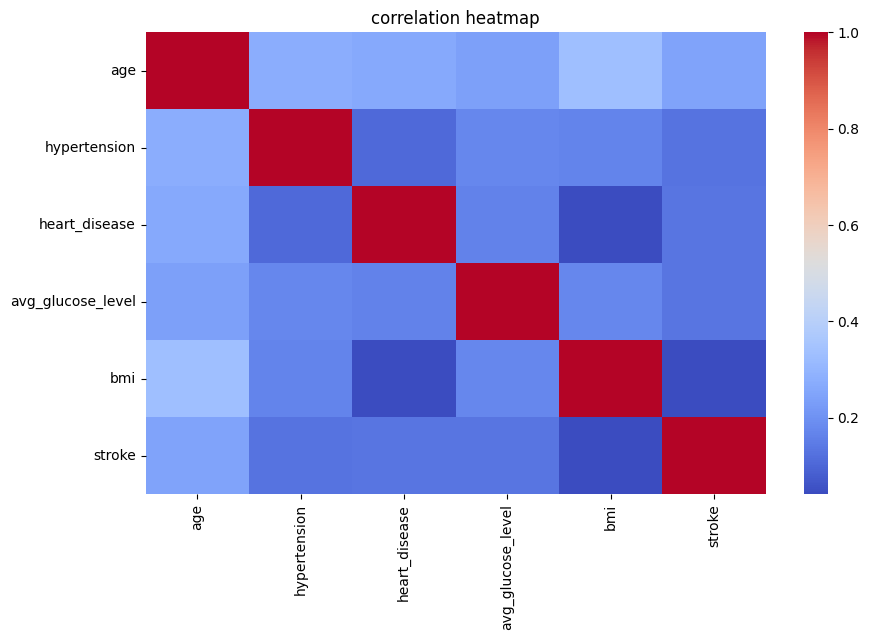

In [11]:
numeric_data_frame = data_frame.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])
corr_matrix = numeric_data_frame.corr()

matplotlib.pyplot.figure(figsize=(10, 6))
seaborn.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
matplotlib.pyplot.title("correlation heatmap")
matplotlib.pyplot.show()

### Scatter Matrix 


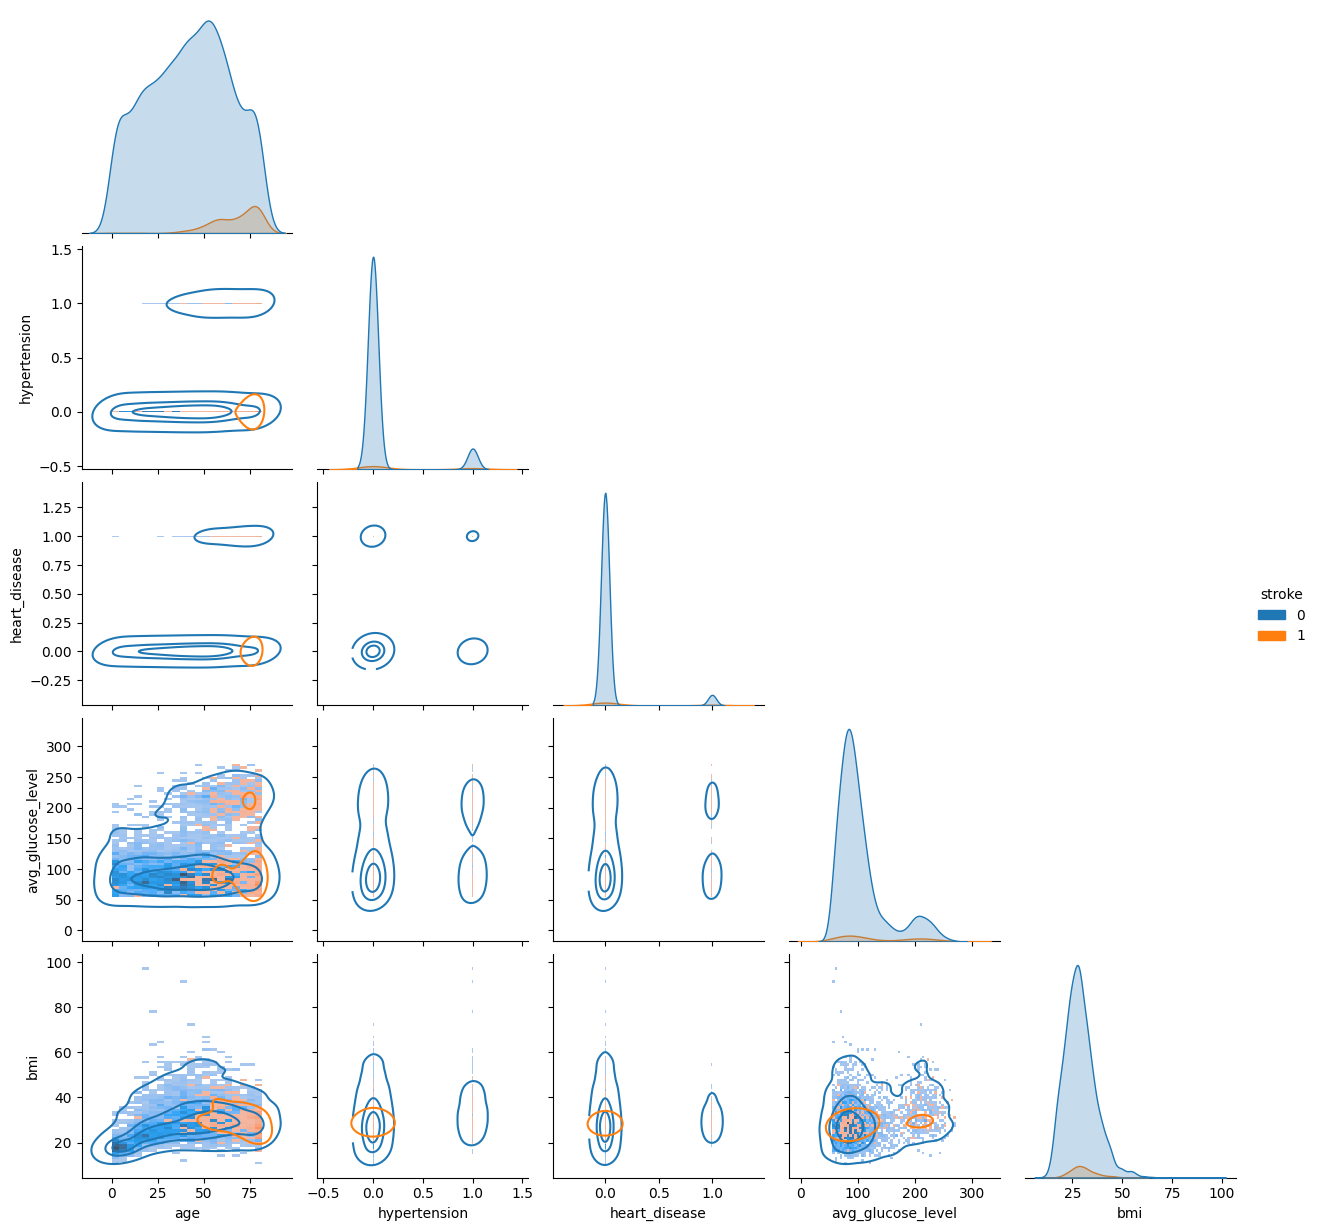

In [12]:
pairplot = seaborn.pairplot(
    data_frame.drop('id', axis=1), 
    hue='stroke', 
    diag_kind="kde", 
    kind="hist", 
    corner=True
)

pairplot.map_lower(
    seaborn.kdeplot, 
    levels=4, 
    color=".2"
)

matplotlib.pyplot.show()

### Scatter Plot

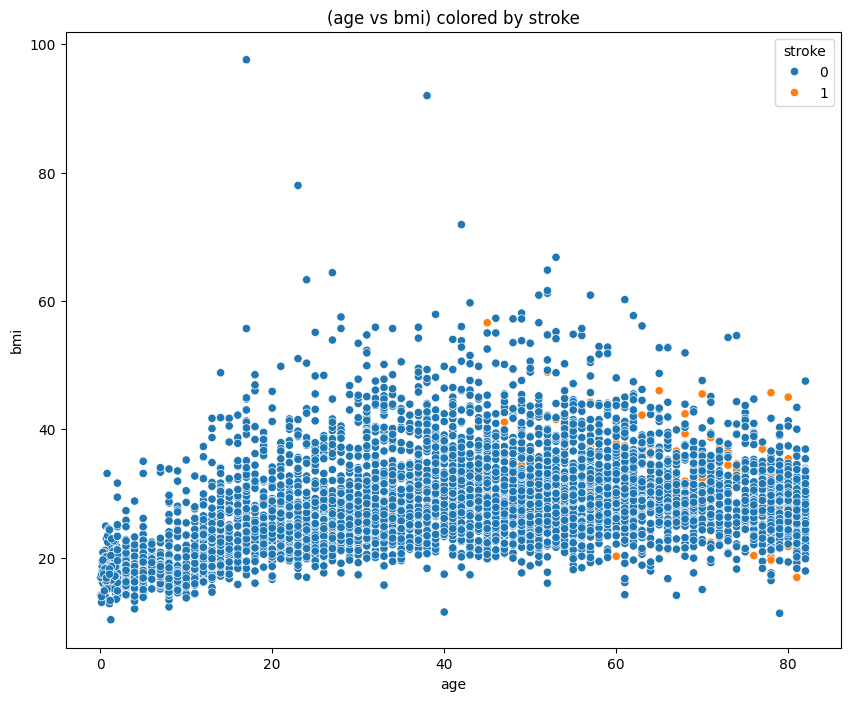

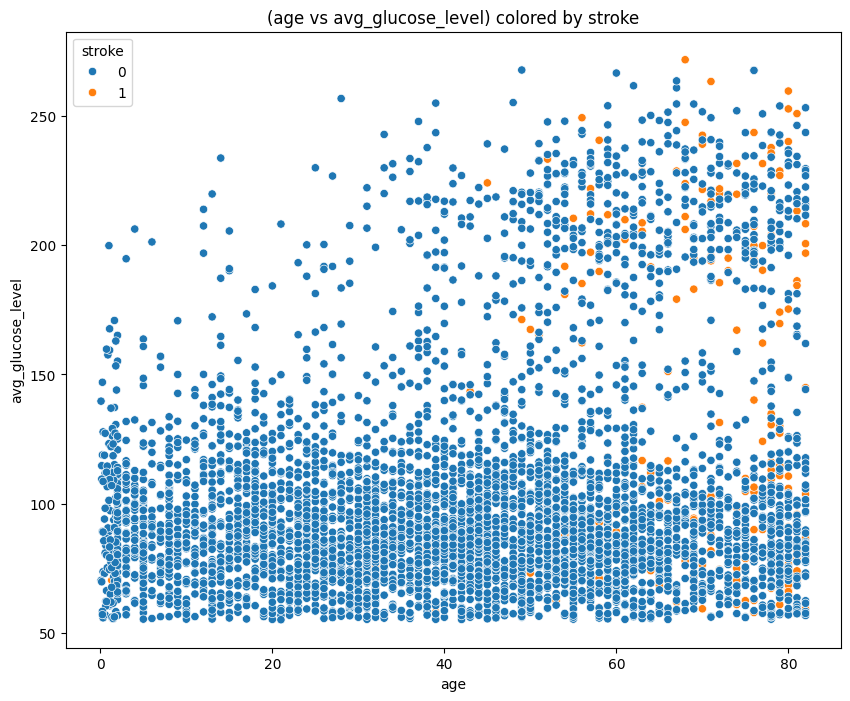

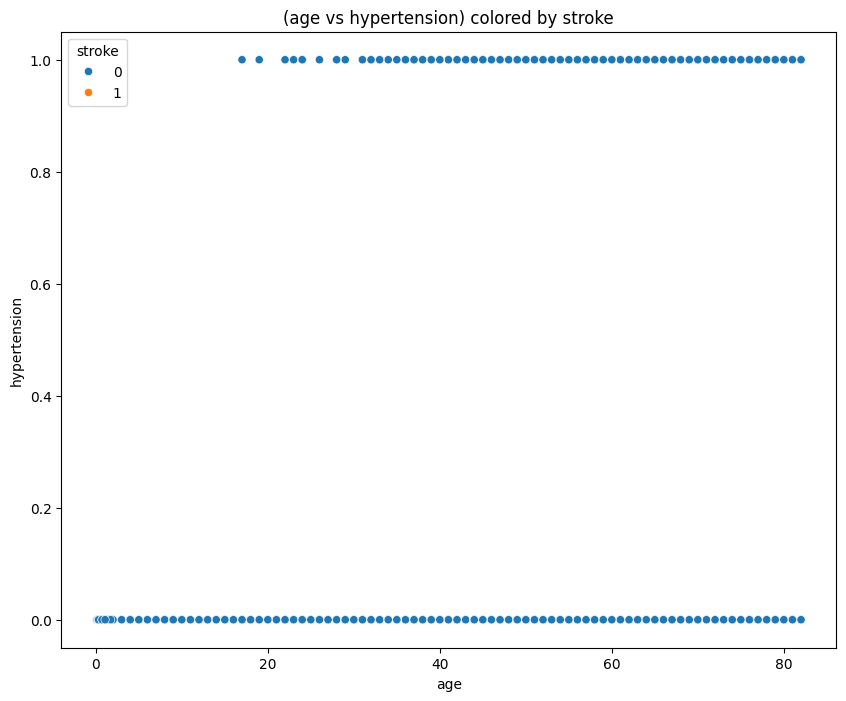

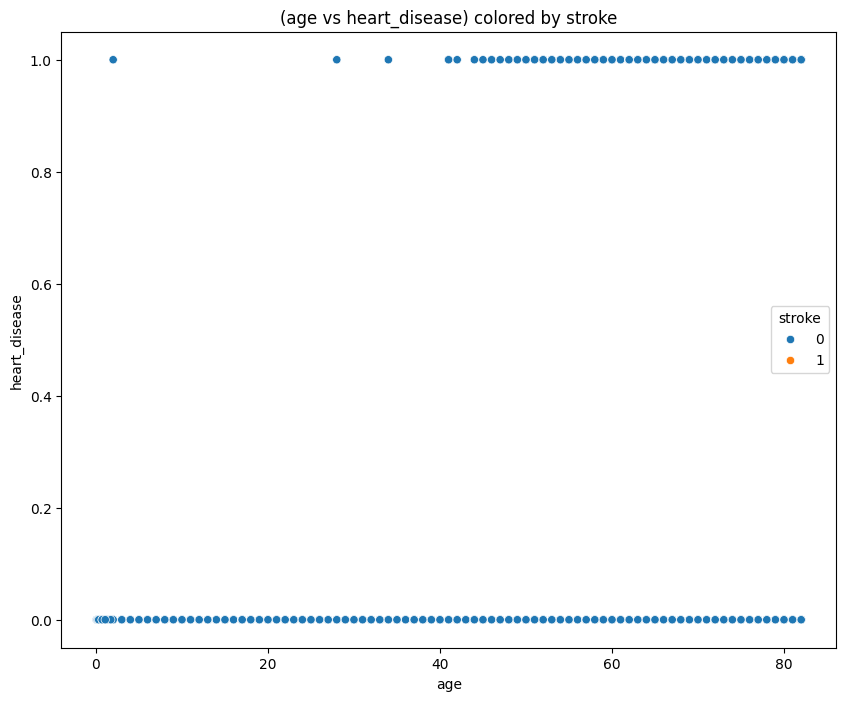

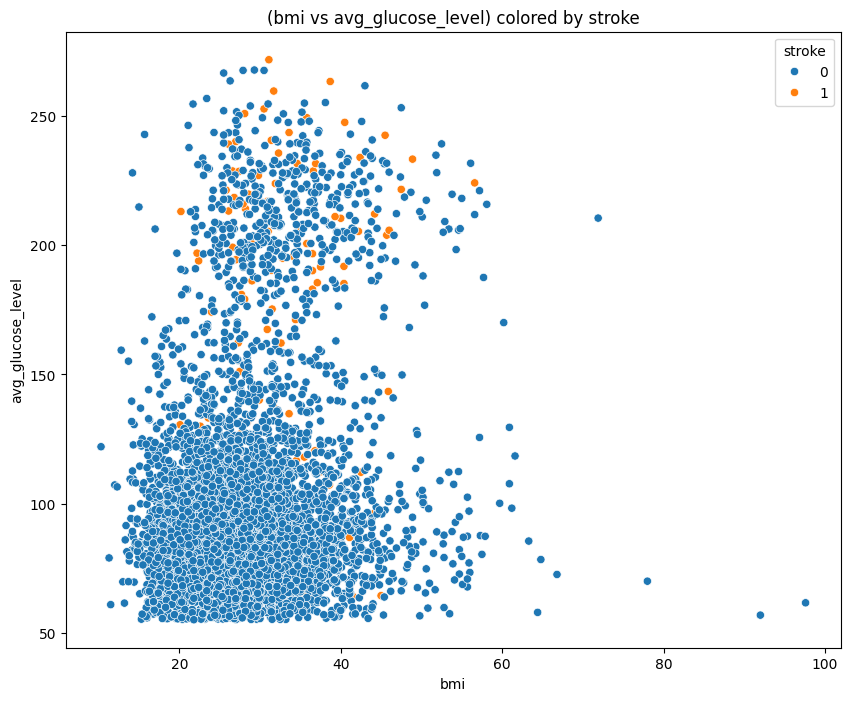

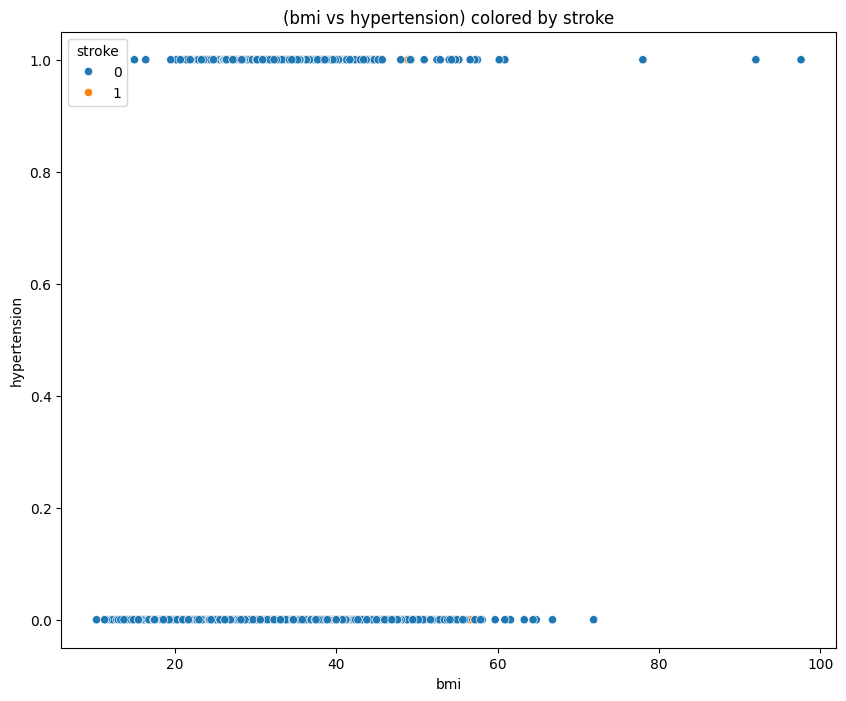

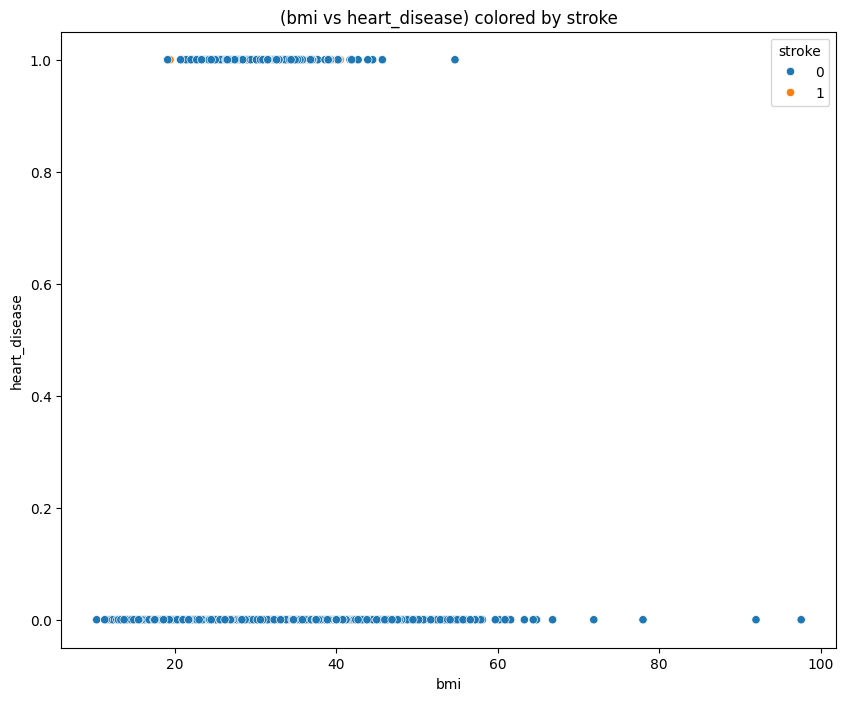

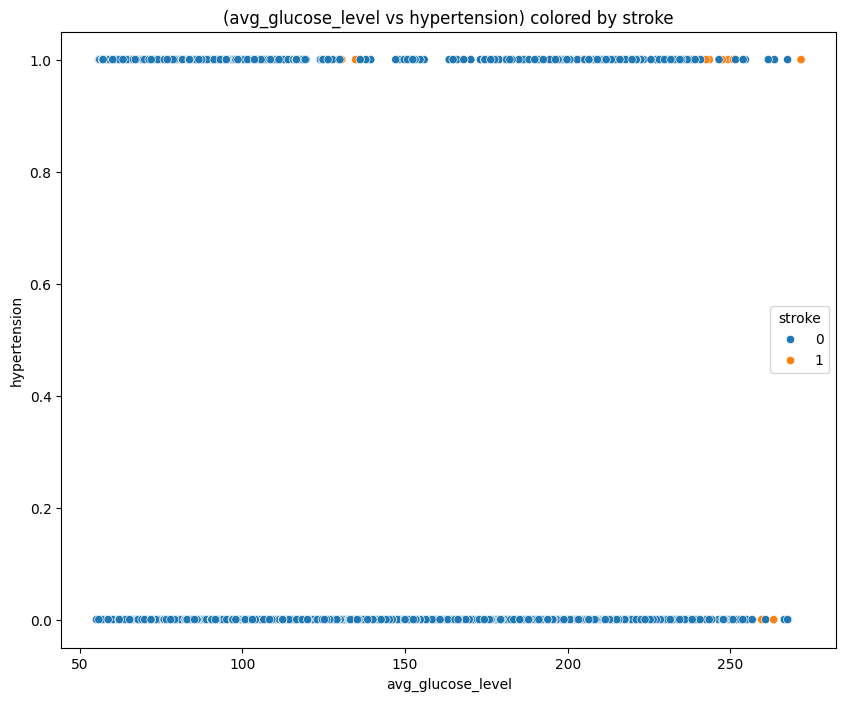

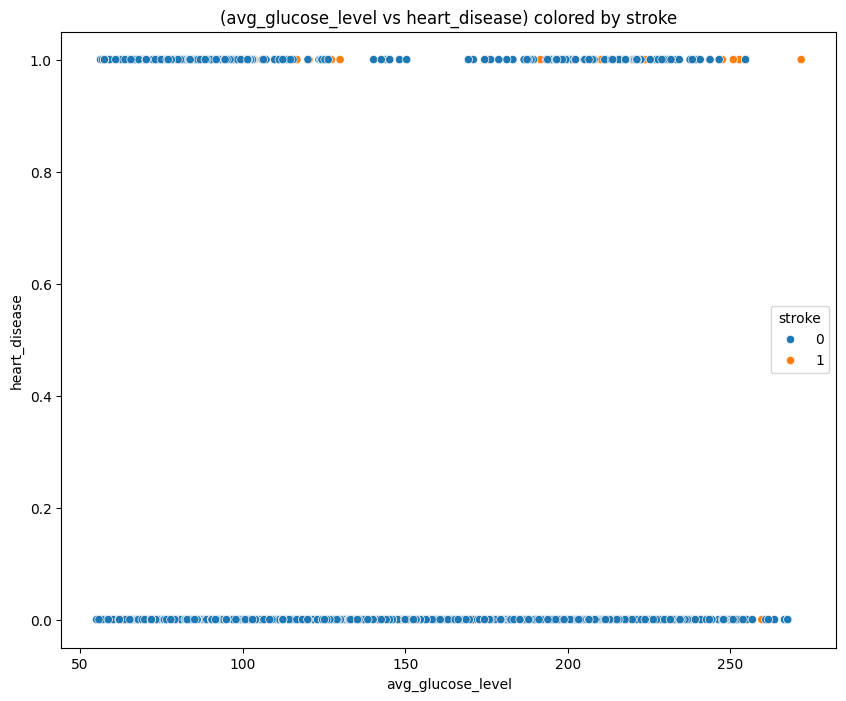

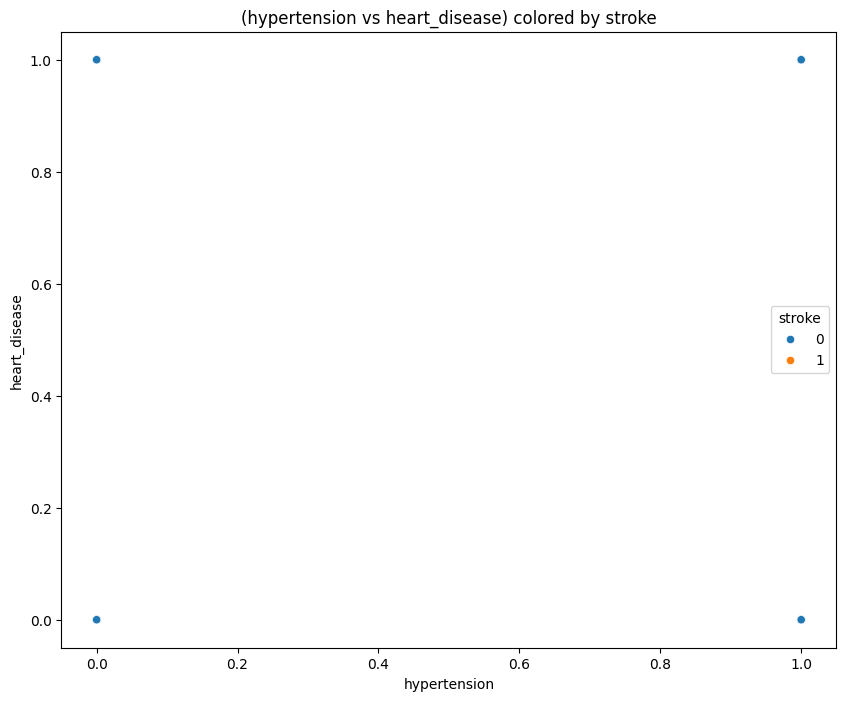

In [13]:
features = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']
for i in range(len(features)): # generate scatter plots for all unique pairs
    for j in range(i + 1, len(features)):
        x = features[i]
        y = features[j]
        matplotlib.pyplot.figure(figsize=(10, 8))
        seaborn.scatterplot(x=x, y=y, hue='stroke', data=data_frame)
        matplotlib.pyplot.title(f"({x} vs {y}) colored by stroke")
        matplotlib.pyplot.show()

### Box Plot

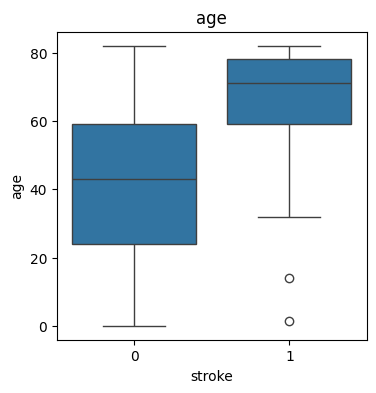

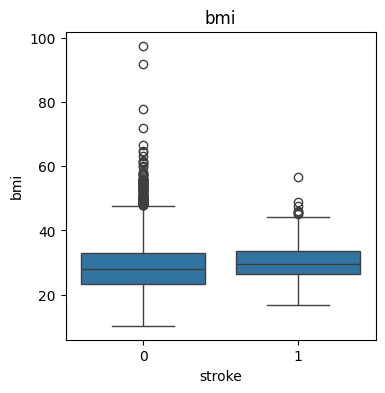

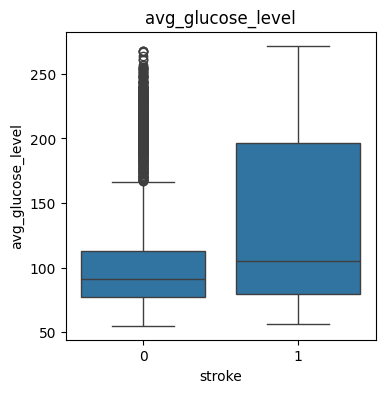

In [14]:
features = ['age', 'bmi', 'avg_glucose_level']
for feature in features:
    matplotlib.pyplot.figure(figsize=(4, 4))
    seaborn.boxplot(x='stroke', y=feature, data=data_frame)
    matplotlib.pyplot.title(feature)
    matplotlib.pyplot.show()

### Count Plot

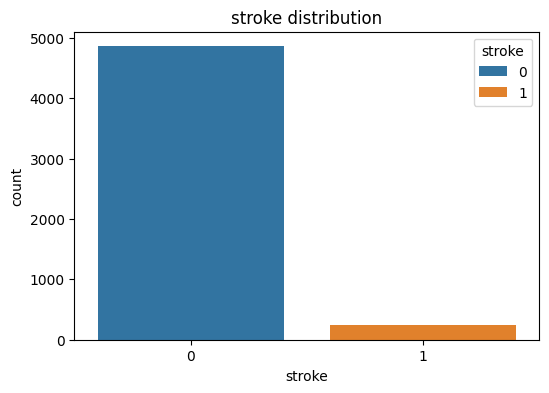

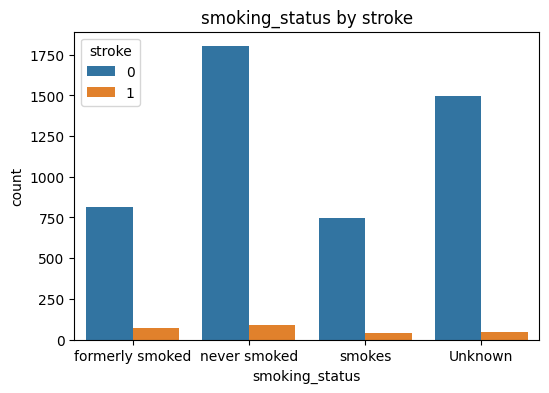

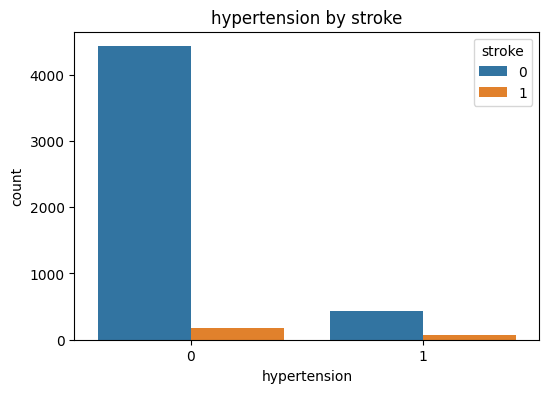

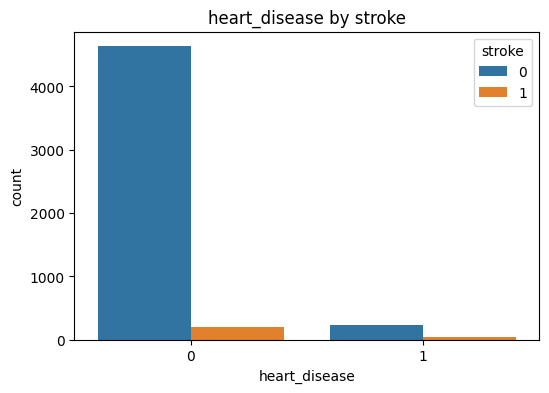

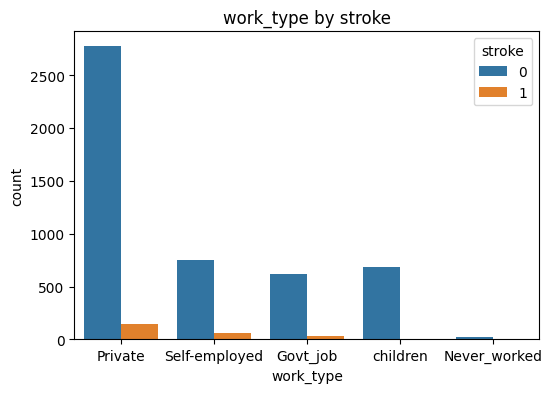

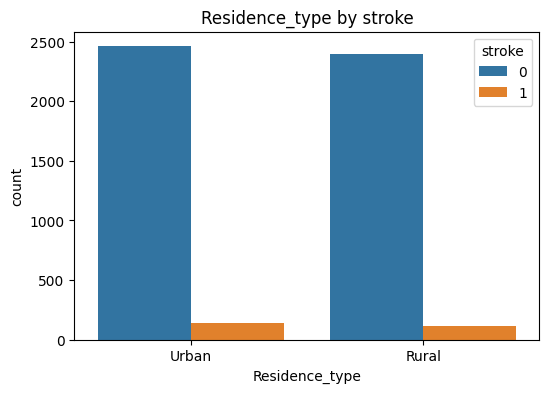

In [15]:
features = ['stroke', 'smoking_status', 'hypertension', 'heart_disease', 'work_type', 'Residence_type']
for feature in features:
    matplotlib.pyplot.figure(figsize=(6, 4))  
    seaborn.countplot(x=feature, hue='stroke', data=data_frame)
    matplotlib.pyplot.title(f'{feature} by stroke' if feature != 'stroke' else 'stroke distribution')
    matplotlib.pyplot.xlabel(feature)
    matplotlib.pyplot.ylabel('count')
    matplotlib.pyplot.show()

### Histogram

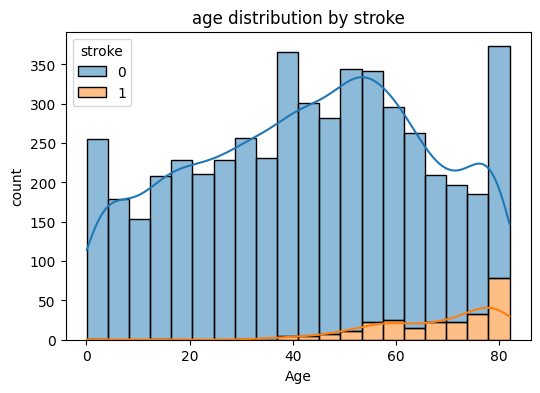

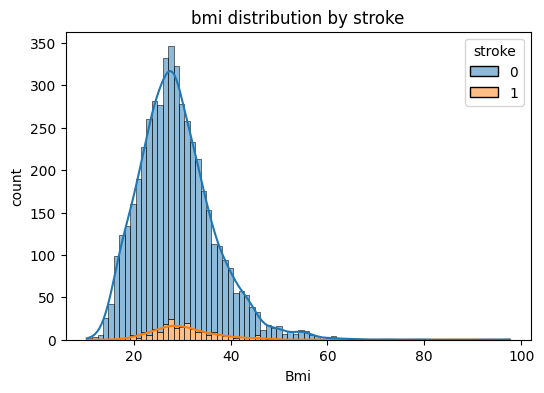

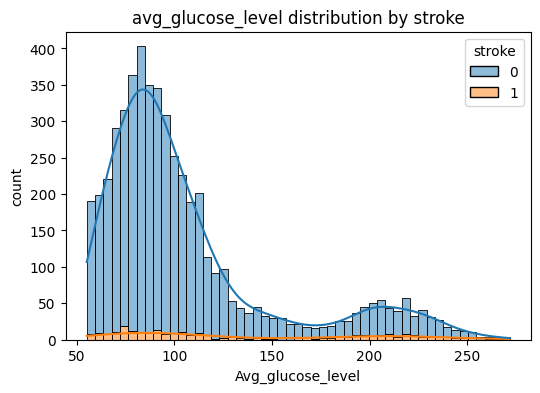

In [16]:
features = ['age', 'bmi', 'avg_glucose_level']
for feature in features:
    matplotlib.pyplot.figure(figsize=(6, 4))  
    seaborn.histplot(data=data_frame, x=feature, hue='stroke', multiple='stack', kde=True)
    matplotlib.pyplot.title(f'{feature} distribution by stroke')
    matplotlib.pyplot.xlabel(feature.capitalize())
    matplotlib.pyplot.ylabel('count')
    matplotlib.pyplot.show()

### Violin Plots

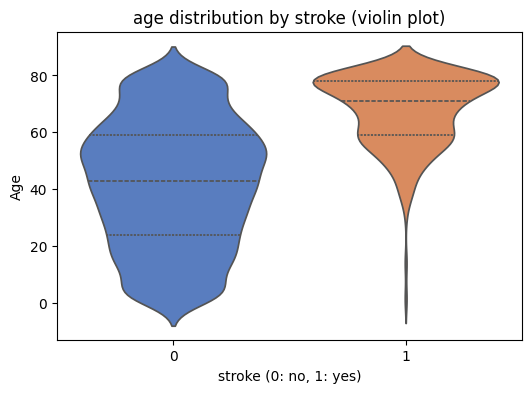

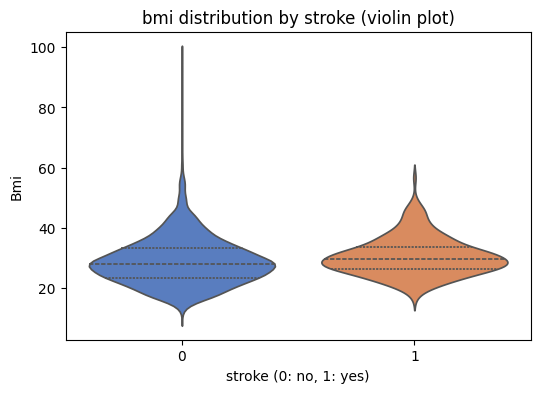

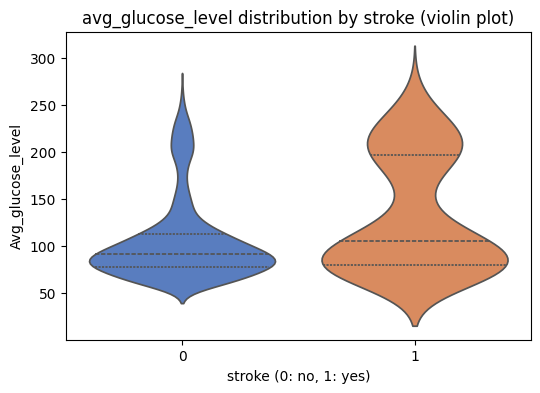

In [17]:
features = ['age', 'bmi', 'avg_glucose_level']
for feature in features:
    matplotlib.pyplot.figure(figsize=(6, 4))
    seaborn.violinplot(x='stroke', y=feature, data=data_frame, inner='quartile', palette='muted', hue='stroke', legend=False)
    matplotlib.pyplot.title(f"{feature} distribution by stroke (violin plot)")
    matplotlib.pyplot.xlabel('stroke (0: no, 1: yes)')
    matplotlib.pyplot.ylabel(feature.capitalize())
    matplotlib.pyplot.show()

### Pie Charts

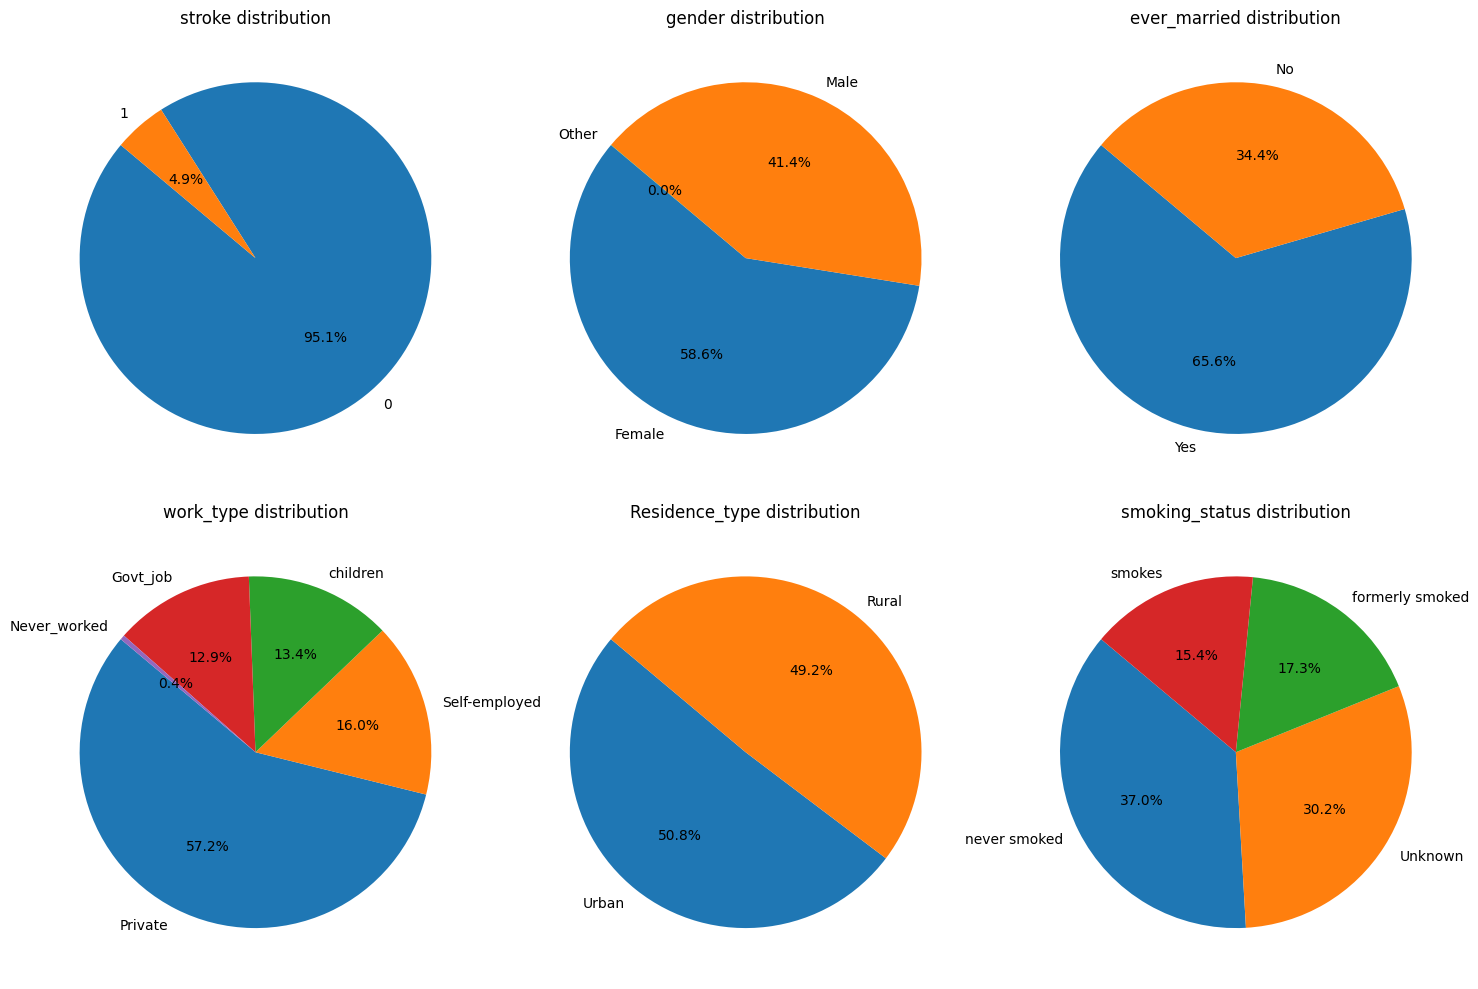

In [18]:
features = ['stroke','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
_, axes = matplotlib.pyplot.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

for index, feature in enumerate(features):
    counts = data_frame[feature].value_counts()
    axes[index].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[index].set_title(f'{feature} distribution')
    axes[index].axis('equal') 

if len(features) < len(axes):
    axes[-1].axis('off')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# Data Processing ♻️
    - 🔎 search for invalid values
    - ❌ drop unused data
    - 🪣 fill missing values
    - ❌ remove outliers
    - 🔑 encode categories
    - 🔪 split data train / test

### Check for invalid numerical values

In [19]:
condition = data_frame[numerical_labels] <= 0
condition.sum()

age                     0
hypertension         4612
heart_disease        4834
avg_glucose_level       0
bmi                     0
dtype: int64

### Check for invalid categorical values

In [20]:
data_frame[categorical_labels].nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [21]:
for label in categorical_labels:
    print(f'{label}:')
    print(data_frame[label].unique())
    print()

gender:
['Male' 'Female' 'Other']

ever_married:
['Yes' 'No']

work_type:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type:
['Urban' 'Rural']

smoking_status:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']



### Check for null values

In [22]:
data_frame.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

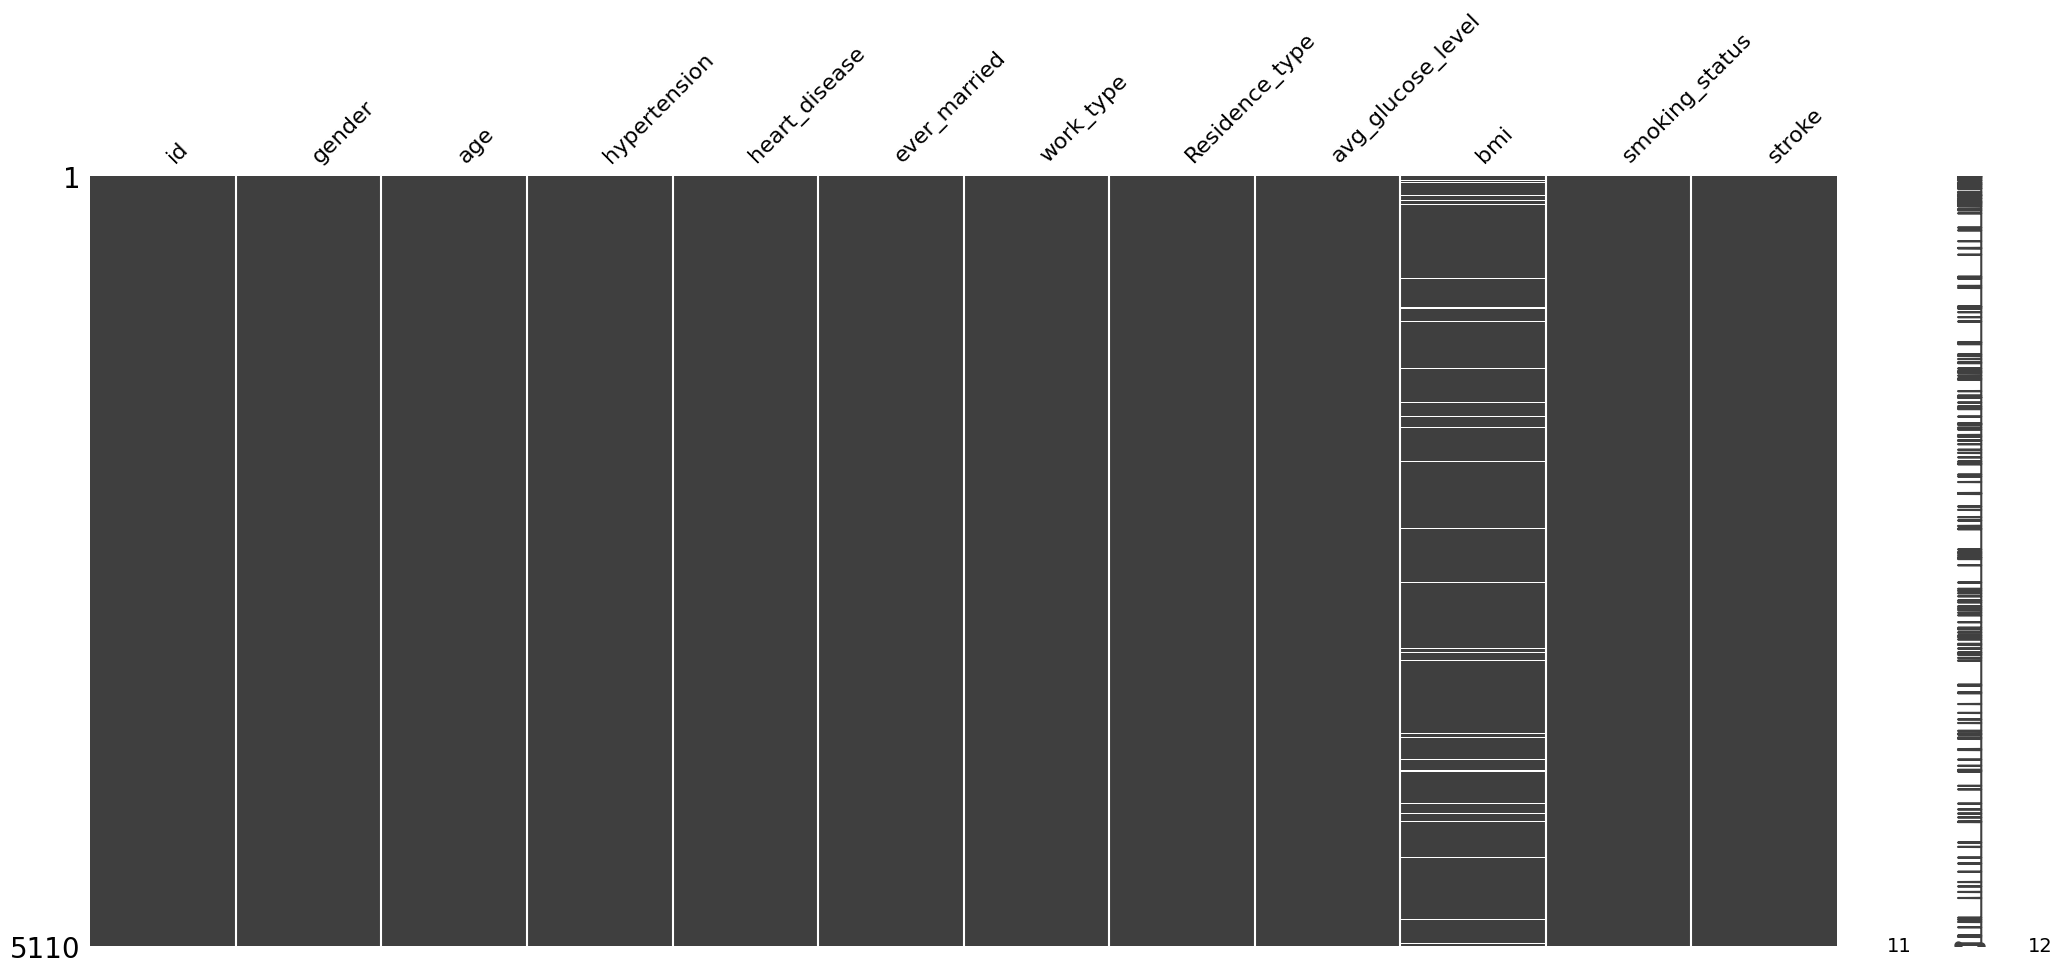

In [23]:
missingno.matrix(data_frame)

<Axes: >

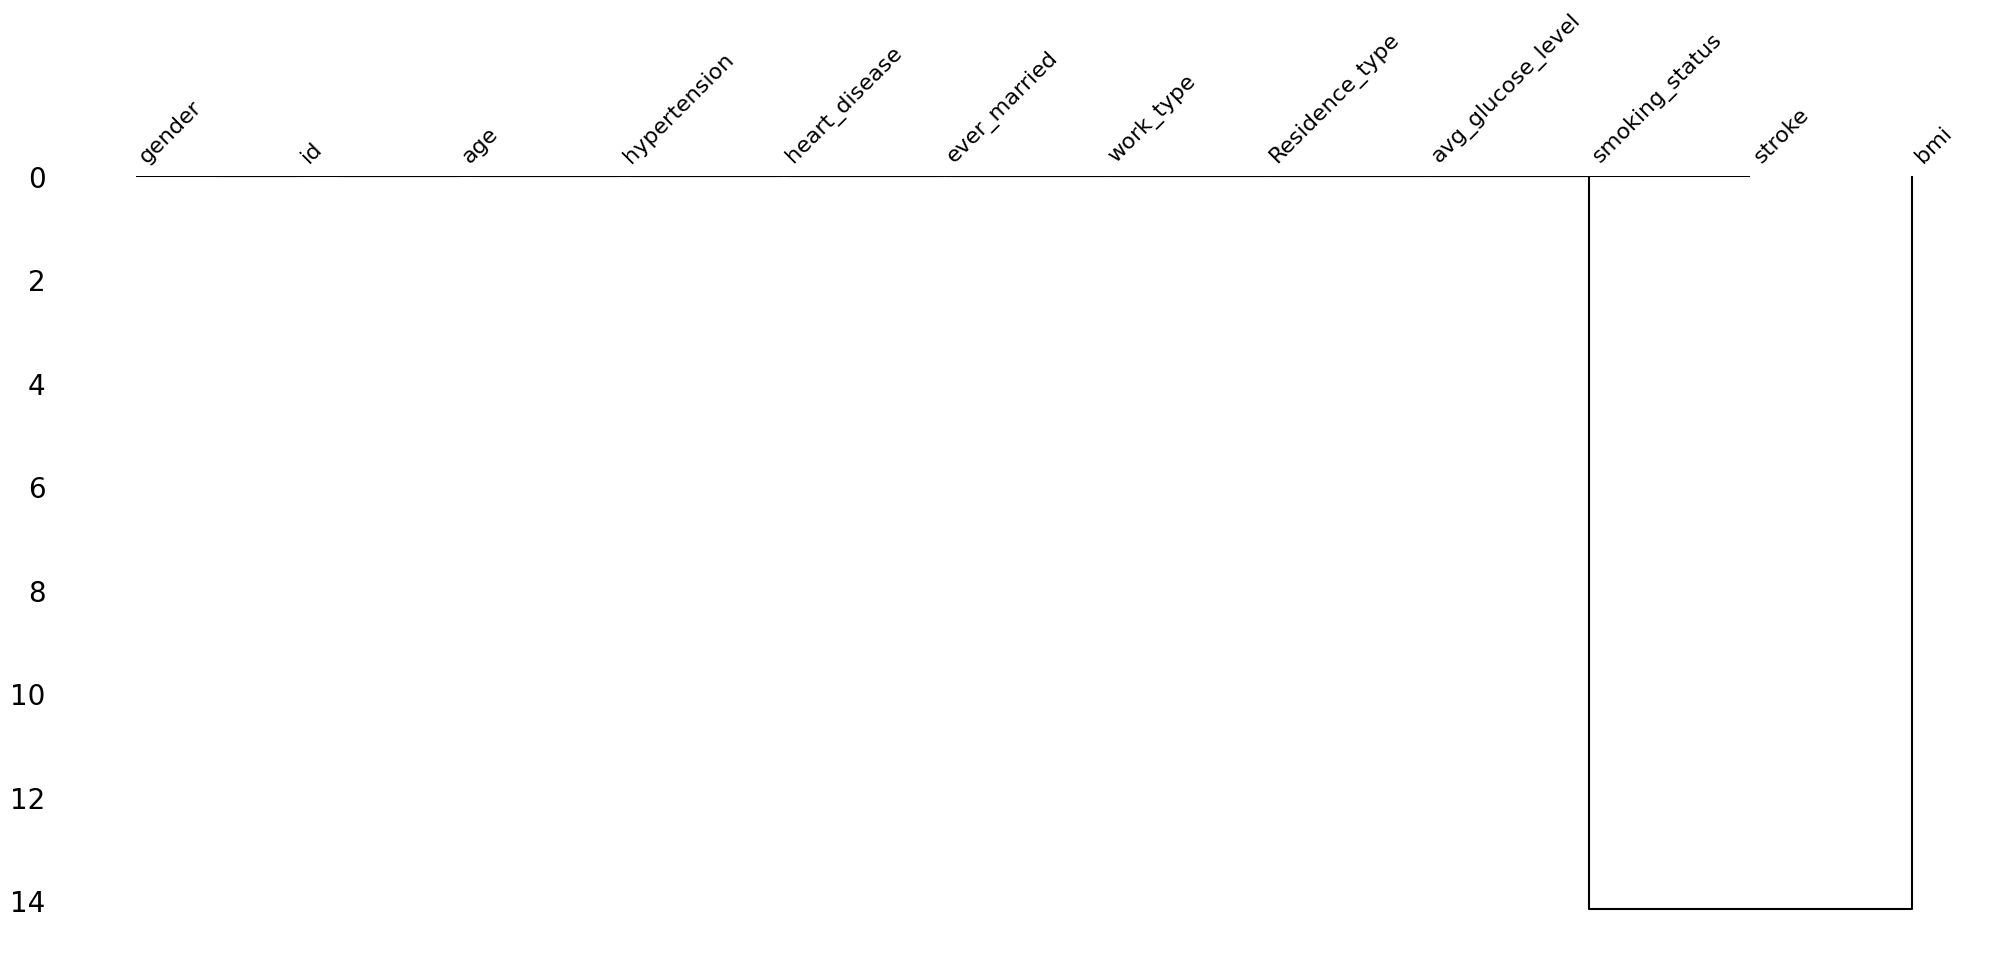

In [24]:
missingno.dendrogram(data_frame)

### Drop id

In [25]:
data_frame_cleand = data_frame.drop(columns=['id'])

### Drop smoking status of 'Unknown'

In [26]:
# very large amount of rows removed revisit
data_frame_cleand = data_frame_cleand[data_frame_cleand['smoking_status'] != 'Unknown']

### Fill missing bmi with mean value

In [27]:
mean_bmi = data_frame_cleand['bmi'].mean()
data_frame_cleand['bmi'].fillna(mean_bmi)

0       36.600000
1       30.290047
2       32.500000
3       34.400000
4       24.000000
          ...    
5102    21.700000
5105    30.290047
5106    40.000000
5107    30.600000
5108    25.600000
Name: bmi, Length: 3566, dtype: float64

### Remove outlier in gender

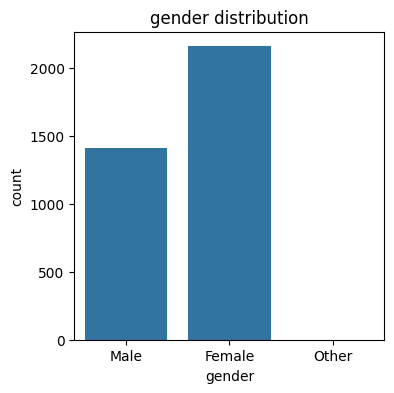

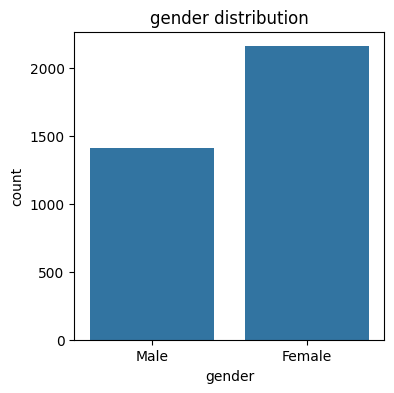

In [28]:
matplotlib.pyplot.figure(figsize=(4,4))
seaborn.countplot(data=data_frame_cleand, x='gender')
matplotlib.pyplot.title('gender distribution')
matplotlib.pyplot.xlabel('gender')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.show()

# Remove rows where 'gender' is 'OTHER'
data_frame_cleand = data_frame_cleand[data_frame_cleand['gender'] != 'Other']

matplotlib.pyplot.figure(figsize=(4,4))
seaborn.countplot(data=data_frame_cleand, x='gender')
matplotlib.pyplot.title('gender distribution')
matplotlib.pyplot.xlabel('gender')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.show()

### Remove outlier in age

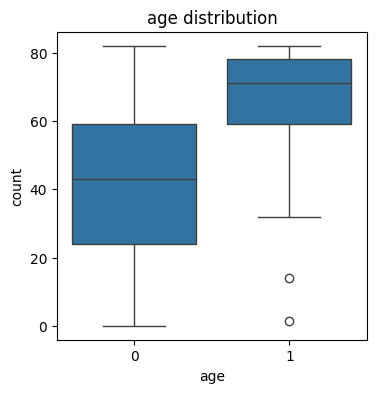

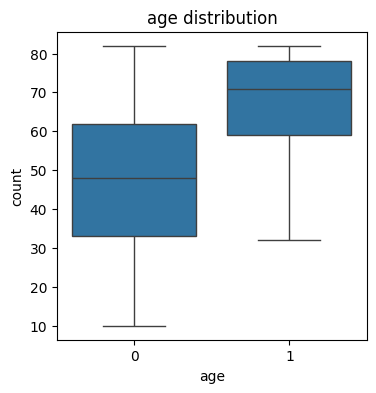

In [29]:
matplotlib.pyplot.figure(figsize=(4, 4))
seaborn.boxplot(x='stroke', y='age', data=data_frame) 
matplotlib.pyplot.title('age distribution')
matplotlib.pyplot.xlabel('age')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.show()

matplotlib.pyplot.figure(figsize=(4, 4))
seaborn.boxplot(x='stroke', y='age', data=data_frame_cleand) 
matplotlib.pyplot.title('age distribution')
matplotlib.pyplot.xlabel('age')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.show()

### Cap extreme or errored BMI values

Text(0, 0.5, 'count')

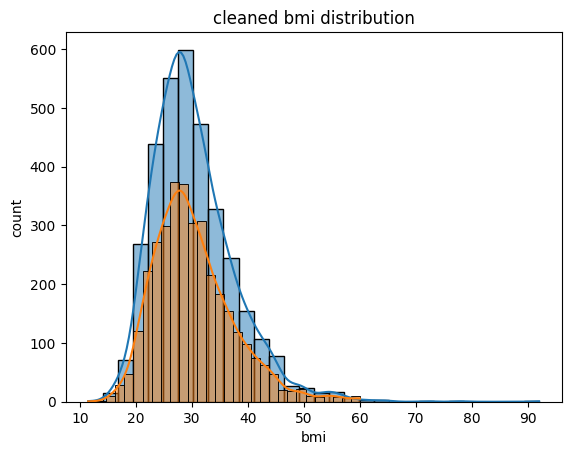

In [30]:
data_frame_cleand = data_frame_cleand[data_frame_cleand['bmi'] >= 1]
seaborn.histplot(data_frame_cleand['bmi'], kde=True, bins=30)
matplotlib.pyplot.title('bmi distribution')
matplotlib.pyplot.xlabel('bmi')
matplotlib.pyplot.ylabel('count')

data_frame_cleand['bmi'] = data_frame_cleand['bmi'].apply(lambda x: 60 if x > 60 else x)

data_frame_cleand = data_frame_cleand[data_frame_cleand['bmi'] >= 1]
seaborn.histplot(data_frame_cleand['bmi'], kde=True, bins=30)
matplotlib.pyplot.title('cleaned bmi distribution')
matplotlib.pyplot.xlabel('bmi')
matplotlib.pyplot.ylabel('count')


### Group rare categorical values

In [31]:
data_frame_cleand['work_type'] = data_frame_cleand['work_type'].replace(['Never_worked', 'children'], 'Non-working')

### Drop target variable 'stroke'

In [32]:
x = data_frame_cleand.drop(columns='stroke') 
y = data_frame_cleand['stroke']

### Hot encode features

In [33]:
encoder = sklearn.preprocessing.OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(x[categorical_labels])

cols = encoder.get_feature_names_out(categorical_labels)
x_encoded = pandas.concat([x.drop(columns=categorical_labels), pandas.DataFrame(encoded, columns=cols, index=x.index)], axis=1)

print(x_encoded.iloc[0])

age                             67.00
hypertension                     0.00
heart_disease                    1.00
avg_glucose_level              228.69
bmi                             36.60
gender_Male                      1.00
ever_married_Yes                 1.00
work_type_Non-working            0.00
work_type_Private                1.00
work_type_Self-employed          0.00
Residence_type_Urban             1.00
smoking_status_never smoked      0.00
smoking_status_smokes            0.00
Name: 0, dtype: float64


### Split data

In [34]:
# First split: train+validation and test (80%-20%)
x_temp, x_test, y_temp, y_test = sklearn.model_selection.train_test_split(
    x_encoded, y, test_size=0.2
)

# Second split: train and validation (from temp, 75%-25% of temp -> 60%-20% of total)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
    x_temp, y_temp, test_size=0.25
)

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f'Training set: {X_train.shape} 60%')
print(f'Validation set: {X_val.shape} 20%')
print(f'Testing set: {x_test.shape} 20%')

Training set: (3874, 13) 60%
Validation set: (685, 13) 20%
Testing set: (685, 13) 20%


# Classification 📈
    - 🏋️ Train model with training set.
    - 🎱 Predict with validation set.
    - 🔎 Verify predictions.
    - 📈 Analyze / Visualize results.

### Random Forest

In [35]:
model = sklearn.ensemble.RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Confusion Matrix:\n", sklearn.metrics.confusion_matrix(y_test, y_pred))

# Set up 5-fold cross-validation
k_fold = sklearn.model_selection.KFold(n_splits=5, shuffle=True)

# Perform cross-validation to get accuracy scores
cv_scores = sklearn.model_selection.cross_val_score(model, x_encoded, y, cv=k_fold, scoring='accuracy')

print("\nCross-validation accuracy scores for each fold:", cv_scores)
print("Mean cross-validation accuracy: {:.2f}".format(cv_scores.mean()))

report = sklearn.metrics.classification_report(y_test, y_pred, output_dict=True)
report_dataframe = pandas.DataFrame(report).transpose() * 100
print("\nClassification Report (as %):\n", report_dataframe.round(2))

accuracy_dt = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt:.2f}")

joblib.dump(model, "random_forest_model.pkl")

Confusion Matrix:
 [[651   7]
 [ 26   1]]

Cross-validation accuracy scores for each fold: [0.94890511 0.9459854  0.95036496 0.94014599 0.94160584]
Mean cross-validation accuracy: 0.95

Classification Report (as %):
               precision  recall  f1-score   support
0                 96.16   98.94     97.53  65800.00
1                 12.50    3.70      5.71   2700.00
accuracy          95.18   95.18     95.18     95.18
macro avg         54.33   51.32     51.62  68500.00
weighted avg      92.86   95.18     93.91  68500.00
Accuracy: 0.95


['random_forest_model.pkl']

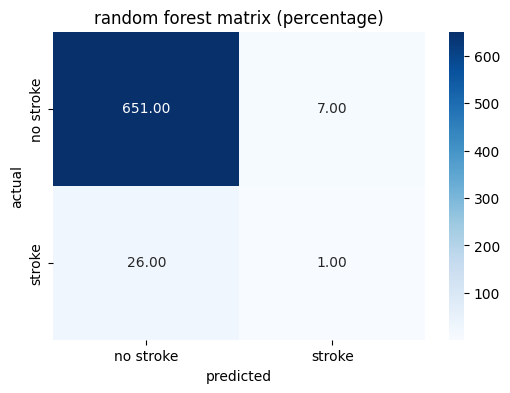

In [36]:
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# cm_percentage = matrix.astype('float') / matrix.sum(axis=1)[:, numpy.newaxis] * 100

matplotlib.pyplot.figure(figsize=(6, 4))
seaborn.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=["no stroke", "stroke"], yticklabels=["no stroke", "stroke"])
matplotlib.pyplot.title("random forest matrix (percentage)")
matplotlib.pyplot.xlabel("predicted")
matplotlib.pyplot.ylabel("actual")
matplotlib.pyplot.show()